In [352]:
import pandas as pd
import matplotlib.pyplot as plt

In [353]:
#Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [354]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [355]:
import io
# df = pd.read_csv('/content/drive/MyDrive/kashmirtourism.csv',names =['id','date','tweets'])
#data = pd.read_csv('/content/kashmirtourism.txt', sep='\t')

In [357]:
df = pd.read_csv('Tweets.csv')

*Text 
  * Text Preprocessing
  * Sentiment Analysis
  * Keyword Extraction
  * Entity Extraction

In [358]:
#check columns
df.columns

Index(['tweets'], dtype='object')

In [359]:
#tweets=data_frame['tweets']
#tweets

In [ ]:
# Making a dataframe for the tweets
#df  = pd.DataFrame(tweets)

In [360]:
df.head()

,tweets
0,'New #developments paving their way in the #va...
1,'An artist by heart
2,'An artist by heart
3,'Know which are the best places to visit when ...
4,'#Gulmarg has emerged as a popular skiing dest...


In [361]:
#DataType of the tweets
type(df)

pandas.core.frame.DataFrame

In [362]:
#data_frame.head()

In [363]:
#tweets.to_csv('Tweets.csv',index = False)

In [364]:
#data.set_index(['Tweet_id', 'Date','Tweets'], drop=False, append=True, inplace=True)

### Text Analysis of the tweets

In [365]:
!pip install neattext

In [366]:
#Load Text Cleaning Package
import neattext.functions as nfx

In [367]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

### Noise
 * remove mentions/userhandles
 * remove hashtages
 * urls
 * emojis
 * special char

In [368]:
df['tweets'].apply(nfx.extract_hashtags)

0       [#developments, #valley\nThis, #industrializat...
1                                                      []
2                                                      []
3       [#kashmirvalley, #kashmirtourism, #tourpackage...
4                                              [#Gulmarg]
                              ...                        
6362    [#InterlocutorTourism, #MillionDollarQuestion,...
6363                                    [#KashmirTourism]
6364             [#kashmir, #kashmirtourism, #islamabad']
6365             [#kashmir, #kashmirtourism, #islamabad']
6366             [#Kashmir, #mykashmir, #kashmirtourism']
Name: tweets, Length: 6367, dtype: object

In [369]:
#Cleaning hashtags
df['extracted_hashtags']=df['tweets'].apply(nfx.extract_hashtags)

In [370]:
df[['extracted_hashtags','tweets']]

,extracted_hashtags,tweets
0,"[#developments, #valley\nThis, #industrializat...",'New #developments paving their way in the #va...
1,[],'An artist by heart
2,[],'An artist by heart
3,"[#kashmirvalley, #kashmirtourism, #tourpackage...",'Know which are the best places to visit when ...
4,[#Gulmarg],'#Gulmarg has emerged as a popular skiing dest...
...,...,...
6362,"[#InterlocutorTourism, #MillionDollarQuestion,...",'@waaywoph #InterlocutorTourism has surely com...
6363,[#KashmirTourism],@christinedelhi So relieved that I'm not the o...
6364,"[#kashmir, #kashmirtourism, #islamabad']",'RT @kashmirfollow: Just added myself to the h...
6365,"[#kashmir, #kashmirtourism, #islamabad']",'Just added myself to the http://wefollow.com ...


In [371]:
#cleaning Tweets
df['clean_tweet'] = df['tweets'].apply(nfx.remove_hashtags)

In [372]:
df[['tweets','clean_tweet']]

,tweets,clean_tweet
0,'New #developments paving their way in the #va...,'New paving their way in the is a for ...
1,'An artist by heart,'An artist by heart
2,'An artist by heart,'An artist by heart
3,'Know which are the best places to visit when ...,'Know which are the best places to visit when ...
4,'#Gulmarg has emerged as a popular skiing dest...,' has emerged as a popular skiing destination...
...,...,...
6362,'@waaywoph #InterlocutorTourism has surely com...,'@waaywoph has surely comes to an end... Whi...
6363,@christinedelhi So relieved that I'm not the o...,@christinedelhi So relieved that I'm not the o...
6364,'RT @kashmirfollow: Just added myself to the h...,'RT @kashmirfollow: Just added myself to the h...
6365,'Just added myself to the http://wefollow.com ...,'Just added myself to the http://wefollow.com ...


In [373]:
df['clean_tweet']= df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [374]:
df[['tweets','clean_tweet']]

,tweets,clean_tweet
0,'New #developments paving their way in the #va...,'New paving their way in the is a for ...
1,'An artist by heart,'An artist by heart
2,'An artist by heart,'An artist by heart
3,'Know which are the best places to visit when ...,'Know which are the best places to visit when ...
4,'#Gulmarg has emerged as a popular skiing dest...,' has emerged as a popular skiing destination...
...,...,...
6362,'@waaywoph #InterlocutorTourism has surely com...,' has surely comes to an end... Which touri...
6363,@christinedelhi So relieved that I'm not the o...,So relieved that I'm not the only one having...
6364,'RT @kashmirfollow: Just added myself to the h...,'RT Just added myself to the http://wefollow...
6365,'Just added myself to the http://wefollow.com ...,'Just added myself to the http://wefollow.com ...


In [375]:
import re
df['clean_tweet'] = df['clean_tweet'].replace(r'\s+|\\n', ' ', regex=True) 

In [376]:
df['clean_tweet'].iloc[0]

"'New paving their way in the is a for Kashmir   https://t.co/b17gA6crzZ'"

In [377]:
#Cleaning Tweets :Remove Multiple white spaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [378]:
df['clean_tweet'].iloc[0]

"'New paving their way in the is a for Kashmir https://t.co/b17gA6crzZ'"

In [379]:
#Cleaning Tweets :Remove Multiple white spaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [380]:
#Cleaning Tweets : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [381]:
#Cleaning Tweets: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [382]:
df['clean_tweet'].iloc[0]

'New paving their way in the is a for Kashmir '

In [383]:
#Remove emojis
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_emojis) 

In [384]:
df[['tweets','clean_tweet']]
df.clean_tweet

0           New paving their way in the is a for Kashmir 
1                                      An artist by heart
2                                      An artist by heart
3       Know which are the best places to visit when y...
4        has emerged as a popular skiing destination P...
                              ...                        
6362     has surely comes to an end Which tourism will...
6363     So relieved that Im not the only one having r...
6364    RT Just added myself to the  twitter directory...
6365    Just added myself to the  twitter directory un...
6366    Just added myself to the  twitter directory un...
Name: clean_tweet, Length: 6367, dtype: object

In [385]:
import re
re.sub(r'\bRT\b', '', 'clean_tweet').strip()
df['clean_tweet']=df['clean_tweet'].apply(lambda x: re.sub(r'\bRT\b', '',x ).strip())

In [390]:
re.sub(r"\n","",'clean_tweet')
df['clean_tweet']=df['clean_tweet'].apply(lambda x: re.sub(r"\n","",x ).strip())

In [391]:
df[['tweets','clean_tweet']]


,tweets,clean_tweet
0,'New #developments paving their way in the #va...,New paving their way in the is a for Kashmir
1,'An artist by heart,An artist by heart
2,'An artist by heart,An artist by heart
3,'Know which are the best places to visit when ...,Know which are the best places to visit when y...
4,'#Gulmarg has emerged as a popular skiing dest...,has emerged as a popular skiing destination Pe...
...,...,...
6362,'@waaywoph #InterlocutorTourism has surely com...,has surely comes to an end Which tourism will ...
6363,@christinedelhi So relieved that I'm not the o...,So relieved that Im not the only one having ru...
6364,'RT @kashmirfollow: Just added myself to the h...,Just added myself to the twitter directory un...
6365,'Just added myself to the http://wefollow.com ...,Just added myself to the twitter directory un...


In [393]:
import string
df['clean_tweet'] = df['clean_tweet'].str.rstrip(string.digits)

In [394]:
def cleanUpTweet(txt):
   txt = ''.join((ch for ch in txt if not ch.isdigit()))
   text =re.sub(r'@[^A-Za-z0-9]:+', '', txt)
   txt = re.sub(r'https?:\/\/[A-Za-z0-9\\n.\/]', '', txt)
   txt = re.sub('r:@[:+]+', '', txt)
   return txt

In [395]:
df['clean_tweet']=df['clean_tweet'].apply(cleanUpTweet)

In [396]:
df['clean_tweet'] = df['clean_tweet'].replace(r'\s+|\\n', ' ', regex=True)

In [397]:
import string
import nltk

In [399]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

In [401]:
#Cleaning Tweets :Remove Multiple white spaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [402]:
df['clean_tweet']

0            New paving their way in the is a for Kashmir
1                                      An artist by heart
2                                      An artist by heart
3       Know which are the best places to visit when y...
4       has emerged as a popular skiing destination Pe...
                              ...                        
6362    has surely comes to an end Which tourism will ...
6363    So relieved that Im not the only one having ru...
6364    Just added myself to the twitter directory under 
6365    Just added myself to the twitter directory under 
6366    Just added myself to the twitter directory under 
Name: clean_tweet, Length: 6367, dtype: object

In [403]:
from textblob import TextBlob

In [404]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment_polarity = blob.sentiment.polarity
  sentiment_subjectivity = blob.sentiment.subjectivity
  if sentiment_polarity > 0:
    sentiment_label = "Positive"
  elif sentiment_polarity<0:
      sentiment_label = 'Negative'
  else:
    sentiment_label = 'Neutral'
  result = {'polarity':sentiment_polarity,
            'subjectivity':sentiment_subjectivity,
            'sentiment':sentiment_label}
  return result;


In [405]:
ex1 = df['clean_tweet'].iloc[4]
ex1

'has emerged as a popular skiing destination People from across the World visit Gulmarg to learn and enjoy the sport'

In [406]:
get_sentiment(ex1)

{'polarity': 0.5, 'sentiment': 'Positive', 'subjectivity': 0.7}

In [407]:
df['sentiment_results']=df['clean_tweet'].apply(get_sentiment)

In [408]:
df['sentiment_results']

0       {'polarity': 0.13636363636363635, 'subjectivit...
1       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3       {'polarity': 1.0, 'subjectivity': 0.3, 'sentim...
4       {'polarity': 0.5, 'subjectivity': 0.7, 'sentim...
                              ...                        
6362    {'polarity': 0.25, 'subjectivity': 0.444444444...
6363    {'polarity': -0.15, 'subjectivity': 0.8, 'sent...
6364    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
6365    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
6366    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 6367, dtype: object

In [409]:
df['sentiment_results'].iloc[222]

{'polarity': 0.5, 'sentiment': 'Positive', 'subjectivity': 0.5}

In [410]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,0.136364,0.454545,Positive


In [411]:
df =df.join(pd.json_normalize(df['sentiment_results']))

In [412]:
df.head()

,tweets,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,'New #developments paving their way in the #va...,"[#developments, #valley\nThis, #industrializat...",New paving their way in the is a for Kashmir,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive
1,'An artist by heart,[],An artist by heart,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,'An artist by heart,[],An artist by heart,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
3,'Know which are the best places to visit when ...,"[#kashmirvalley, #kashmirtourism, #tourpackage...",Know which are the best places to visit when y...,"{'polarity': 1.0, 'subjectivity': 0.3, 'sentim...",1.000000,0.300000,Positive
4,'#Gulmarg has emerged as a popular skiing dest...,[#Gulmarg],has emerged as a popular skiing destination Pe...,"{'polarity': 0.5, 'subjectivity': 0.7, 'sentim...",0.500000,0.700000,Positive


In [413]:
df['sentiment'].value_counts()

Neutral     4676
Positive    1473
Negative     218
Name: sentiment, dtype: int64

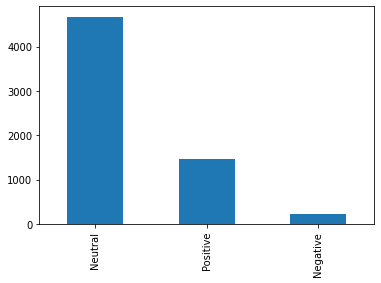

In [414]:
df['sentiment'].value_counts().plot(kind='bar')

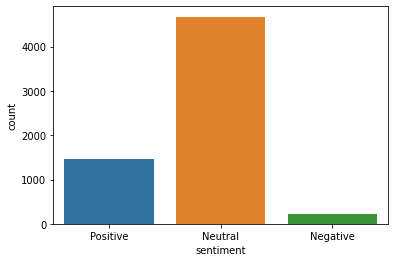

In [415]:
#Plot with searborn
import seaborn as sns
sns.countplot(df['sentiment'])

### Keyword Extraction
+ For postive and negative Sentiment
+ General

In [416]:
### Keyword Extraction
positive_tweet = df[df['sentiment'] =='Positive']['clean_tweet']

In [417]:
neutral_tweet =  df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [418]:
positive_tweet

0            New paving their way in the is a for Kashmir
3       Know which are the best places to visit when y...
4       has emerged as a popular skiing destination Pe...
5       You know it is beautiful when even with the fa...
8       Just some fun with fresh snow Enroute Bangus V...
                              ...                        
6347                      Beautiful View of Lidder Valley
6352                                                 Best
6360              A view from Lalit Grand Palace Srinagar
6361    Top travel tips for a hassle free tour of Kash...
6362    has surely comes to an end Which tourism will ...
Name: clean_tweet, Length: 1473, dtype: object

In [419]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [420]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
Neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [421]:
positive_tweet_list

['New paving way Kashmir',
 'Know best places visit travel Kashmir Link',
 'emerged popular skiing destination People World visit Gulmarg learn enjoy sport',
 'know beautiful faded colors appeals attracts end saying wow mountains Plains kashmir painted beautiful colours nature surely sooth soul Thats',
 'fun fresh snow Enroute Bangus Valley',
 'fun fresh snow Enroute Bangus Valley',
 'Local Shikara Lake Dal overlooking Pir Panjal Range Himalayas rays morning sun JannateKashmir',
 'Local Shikara Lake Dal overlooking Pir Panjal Range Himalayas rays morning sun JannateKashmir',
 'arrival heavenliness guaranteed summer Explore Best Kashmir EMI Holidays Available Enquire web',
 'Kashmir details follow',
 'Snow glad',
 'Snow Enjoy',
 'Snow true jewel Kashmir Vivanta Dal View',
 'Famous tulip garden Kashmir thrown open March lakh tulips expected bloom year',
 'Ancient monuments wisdom',
 'Painted unique culture',
 'Snow Fun survival lowkey image Kashmiri Rhesus Macaque searching food snow Kas

In [422]:
#Tokenization
for line in positive_tweet_list:
  # print(line)
    for token in line.split():
        print(token)

Streaming output truncated to the last 5000 lines.
takes
smile
Amazing
view
Snow
mountains
Kashmir
place
like
entire
world
stones
shine
jewel
crown
Autumn
Kashmir
stunning
delight
Know
Popular
Films
Shot
Jammu
Kashmir
gtgt
Best
Time
Visit
Shalimar
Garden
Jammu
amp
Kashmir
gtgt
moon
beautiful
far
close
stains
PC
Famous
Sukhetar
Chullah
Wali
Chai
Jammu
Udhampur
shows
department
working
flakes
snow
Himachal
highlighted
people
love
beautiful
view
snowcovered
Gulmarg
Wow
hoping
tourism
gets
soon
Kashmir
wants
freedom
Pakistan
backed
Terrorism
citizen
Kashmir
earn
money
tourism
Welcome
Life
starts
gets
crisp
fall
Kokernag
Anantnag
Youth
indulged
sports
entertainment
event
Machhal
Mela
Valley
receive
fresh
spell
snowfall
November
evening
Alluring
Autumn
iconic
Mughal
Gardens
Srinagar
crimson
hues
AatisheChinar
making
Fall
year
irresistible
Picture
Credits
Abid
Bhat
beautiful
valley
SINTHAN
KASHMIR
young
kids
Katrasoo
chinar
symbolic
jammukashmir
makes
region
beautiful
Mylane
delivers
variety


In [423]:
pos_tokens = [token for line in positive_tweet_list for token in line.split()]

In [424]:
neg_tokens = [token for line in negative_tweet_list for token in line.split()]
neut_tokens = [token for line in Neutral_tweet_list for token in line.split()]

In [425]:
pos_tokens

['New',
 'paving',
 'way',
 'Kashmir',
 'Know',
 'best',
 'places',
 'visit',
 'travel',
 'Kashmir',
 'Link',
 'emerged',
 'popular',
 'skiing',
 'destination',
 'People',
 'World',
 'visit',
 'Gulmarg',
 'learn',
 'enjoy',
 'sport',
 'know',
 'beautiful',
 'faded',
 'colors',
 'appeals',
 'attracts',
 'end',
 'saying',
 'wow',
 'mountains',
 'Plains',
 'kashmir',
 'painted',
 'beautiful',
 'colours',
 'nature',
 'surely',
 'sooth',
 'soul',
 'Thats',
 'fun',
 'fresh',
 'snow',
 'Enroute',
 'Bangus',
 'Valley',
 'fun',
 'fresh',
 'snow',
 'Enroute',
 'Bangus',
 'Valley',
 'Local',
 'Shikara',
 'Lake',
 'Dal',
 'overlooking',
 'Pir',
 'Panjal',
 'Range',
 'Himalayas',
 'rays',
 'morning',
 'sun',
 'JannateKashmir',
 'Local',
 'Shikara',
 'Lake',
 'Dal',
 'overlooking',
 'Pir',
 'Panjal',
 'Range',
 'Himalayas',
 'rays',
 'morning',
 'sun',
 'JannateKashmir',
 'arrival',
 'heavenliness',
 'guaranteed',
 'summer',
 'Explore',
 'Best',
 'Kashmir',
 'EMI',
 'Holidays',
 'Available',
 'Enqui

In [426]:
# Get Most Commonest Keywords
from collections import Counter

In [427]:
def get_tokens(docx,num=30):
  word_tokens = Counter(docx)
  most_common = word_tokens.most_common(num)
  result = dict(most_common)
  return result

In [428]:
get_tokens(pos_tokens)

{'Beautiful': 72,
 'Best': 62,
 'Dal': 58,
 'Follow': 107,
 'Gulmarg': 48,
 'India': 51,
 'Jammu': 50,
 'Kashmir': 531,
 'Lake': 53,
 'Notifications': 71,
 'Post': 71,
 'Srinagar': 58,
 'Turn': 71,
 'Visit': 35,
 'Welcome': 36,
 'amp': 96,
 'beautiful': 158,
 'beauty': 74,
 'best': 67,
 'exciting': 76,
 'kashmir': 38,
 'life': 40,
 'nature': 36,
 'place': 49,
 'stuff': 71,
 'time': 35,
 'trip': 37,
 'valley': 45,
 'view': 45,
 'visit': 47}

In [429]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [430]:
#Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
neg_df

,words,scores
0,Kashmir,61
1,Experience,14
2,Endless,14
3,Attractions,14
4,green,12
5,day,10
6,days,9
7,people,9
8,tourism,8
9,little,7


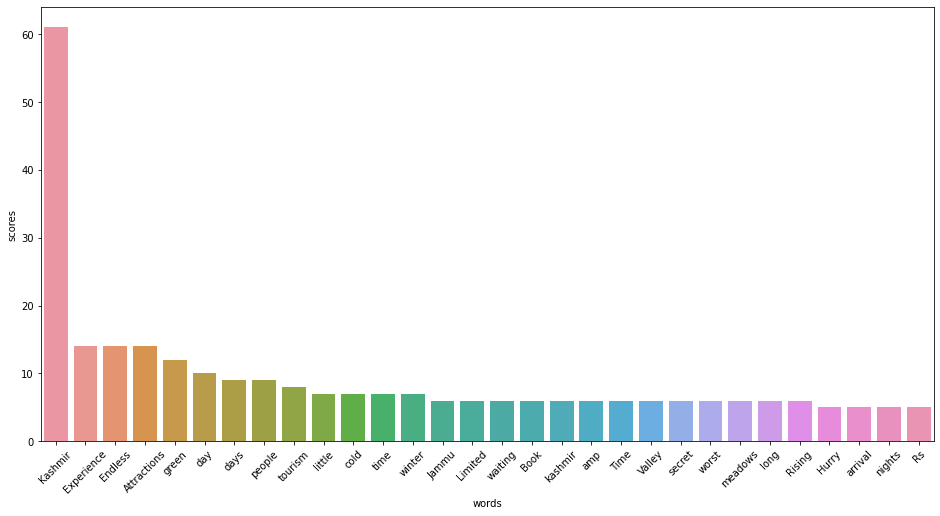

In [432]:
plt.figure(figsize=(16,8))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

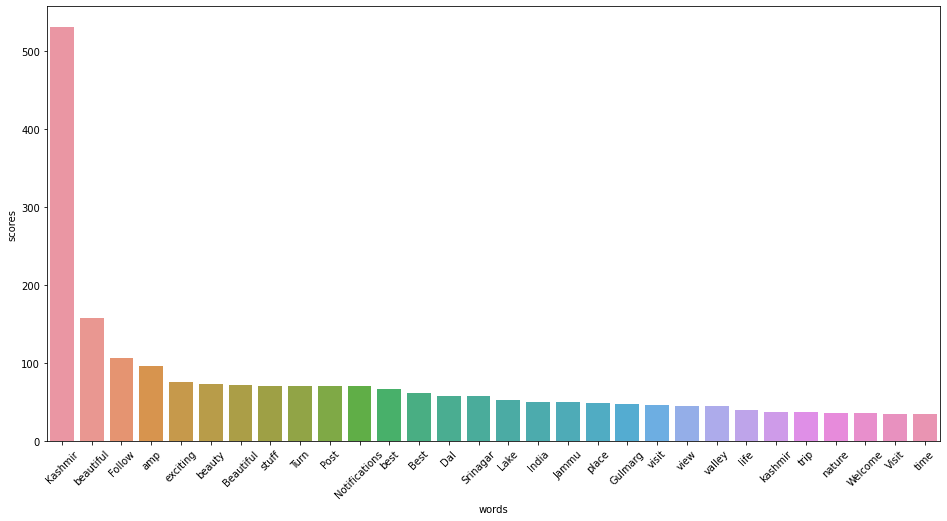

In [434]:
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(16,8))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

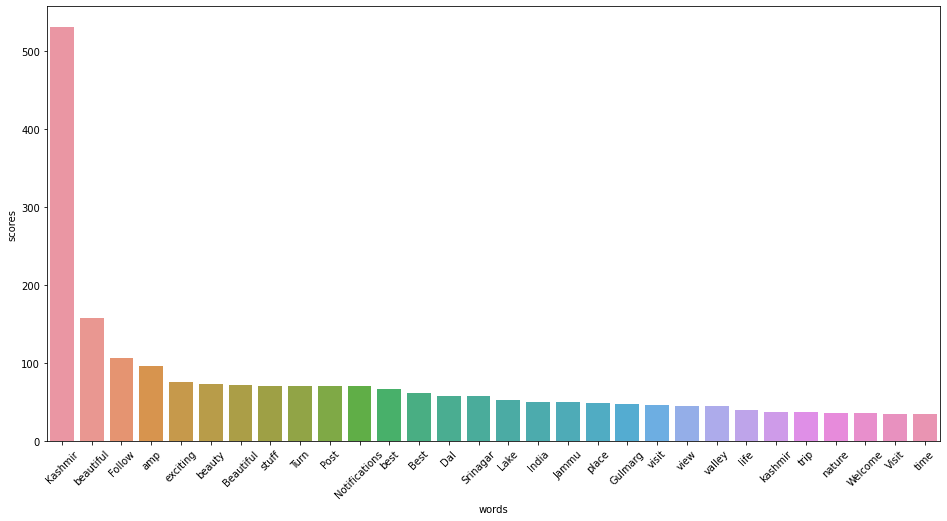

In [435]:
neut_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(16,8))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [436]:
### Word Cloud
from wordcloud import WordCloud


In [437]:
def plot_wordcloud(docx):
  plt.figure(figsize=(20,10))
  mywordcloud = WordCloud().generate(docx)
  plt.imshow(mywordcloud,interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

In [438]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

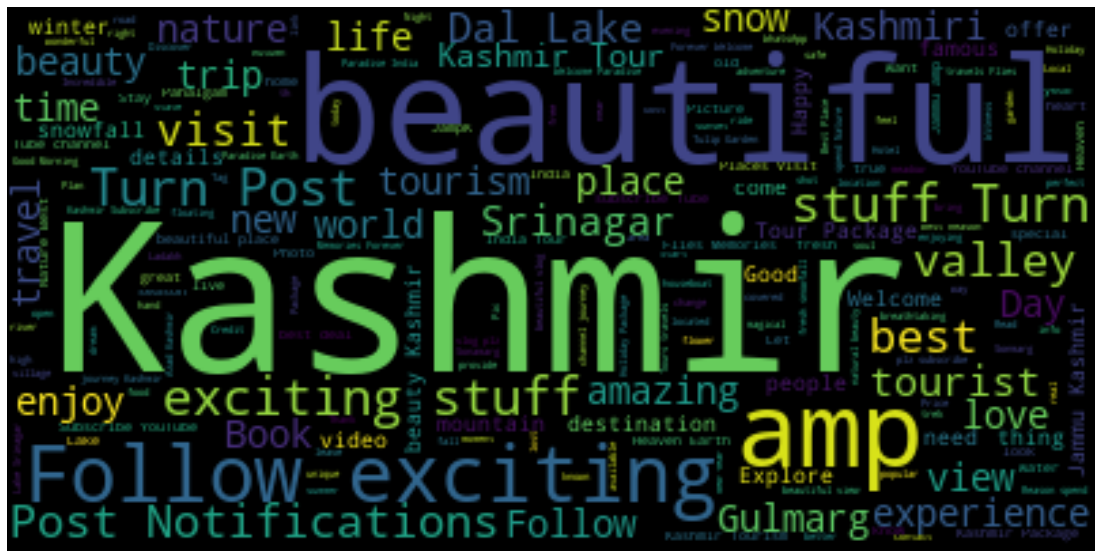

In [439]:
plot_wordcloud(pos_docx)

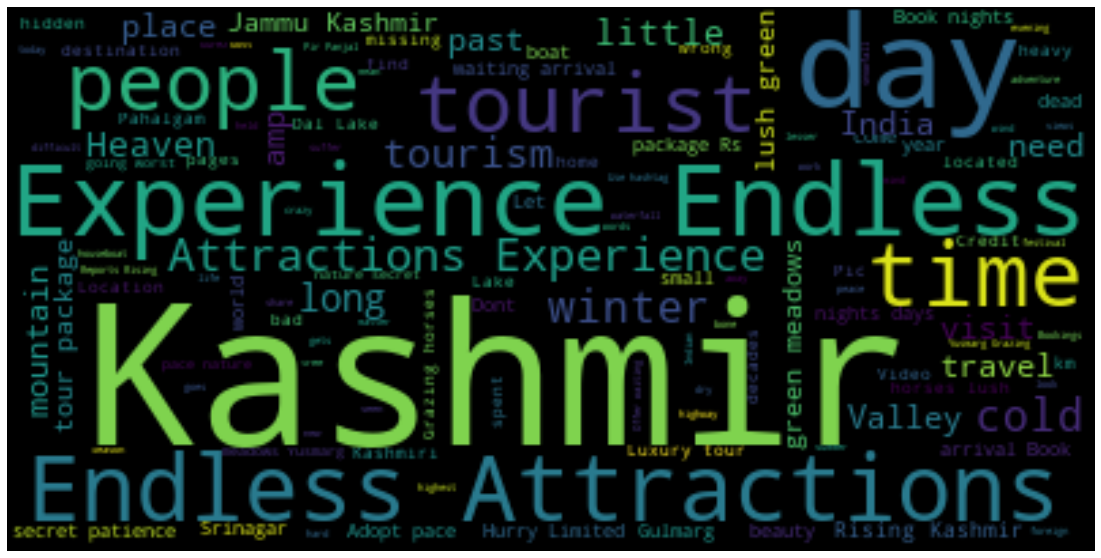

In [440]:
plot_wordcloud(neg_docx)

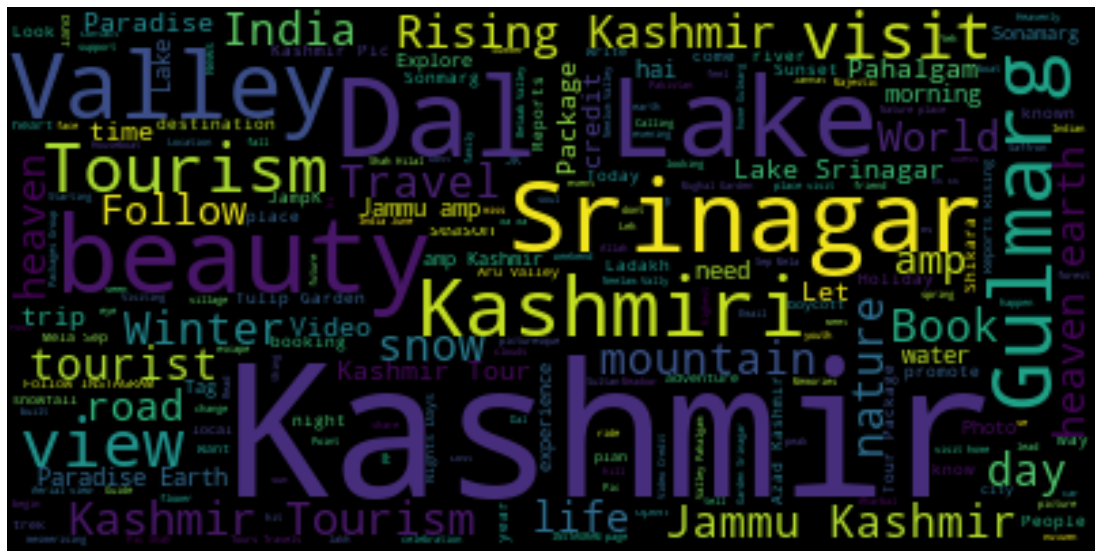

In [441]:
plot_wordcloud(neu_docx)